# Sentinel-1 Backscatter Time Series Analysis via Statistical API

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-1' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-1' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\statistical-api\\cfg\\sentinel-1'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's1-ard-backscatter.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |      
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "VV",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "output_VV",
                            bands: 1,
                            sampleType: "FLOAT32"
                        },
                        {
                            id: "dataMask",
                            bands: 1
                        }]
                    }
                }
                function evaluatePixel(samples) {
                    return {
                        output_VV: [samples.VV],
                        dataMask: [samples.dataMask]
                    }
                }
    inputs:
        - collection: SENTINEL1
      

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "VV",\n                "dataMask"\n            ]\n        }],\n        output: [\n        {\n            id: "output_VV",\n            bands: 1,\n            sampleType: "FLOAT32"\n        },\n        {\n            id: "dataMask",\n            bands: 1\n        }]\n    }\n}\nfunction evaluatePixel(samples) {\n    return {\n        output_VV: [samples.VV],\n        dataMask: [samples.dataMask]\n    }\n}\n', 'inputs': [Munch({'collection': 'SENTINEL1', 'options': Munch({'processing': Munch({'orthorectify': True, 'backCoeff': 'GAMMA0_TERRAIN'})})})]}), 'responses': None})

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-05-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-09-30', '%Y-%m-%d') }

In [8]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [9]:
from sentinelhub import CRS

# define min and max latlons
coords = 414315, 4958219, 414859, 4958819
crs = CRS( 32633 )
bbox = client.getBoundingBox( coords, src_crs=crs )

In [10]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=10, bbox=bbox, interval='P5D' )

In [11]:
response._dfs[ 0 ]

,interval_from,interval_to,output_VV_B0_min,output_VV_B0_max,output_VV_B0_mean,output_VV_B0_stDev,output_VV_B0_sampleCount,output_VV_B0_noDataCount
0,2020-05-01,2020-05-06,0.000000,0.359779,0.043459,0.052862,3240,0
1,2020-05-06,2020-05-11,0.000000,0.374822,0.047235,0.054710,3240,0
2,2020-05-11,2020-05-16,0.000000,0.324824,0.047187,0.052650,3240,0
3,2020-05-16,2020-05-21,0.001220,1.513374,0.080369,0.083645,3240,0
4,2020-05-21,2020-05-26,0.000000,0.396511,0.051440,0.057363,3240,0
5,2020-05-26,2020-05-31,0.000000,0.529013,0.053132,0.058491,3240,0
6,2020-05-31,2020-06-05,0.000000,0.695261,0.051753,0.065242,3240,0
7,2020-06-05,2020-06-10,0.000000,0.341267,0.045845,0.050328,3240,0
8,2020-06-10,2020-06-15,0.000000,0.452018,0.052338,0.061434,3240,0
9,2020-06-15,2020-06-20,0.000000,2.722343,0.066153,0.106536,3240,0


<AxesSubplot:xlabel='interval_from'>

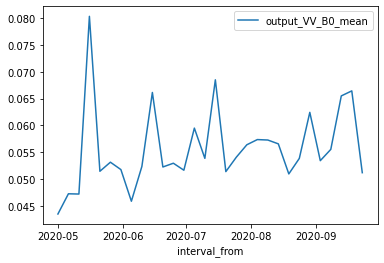

In [13]:
response._dfs[ 0 ].plot( x='interval_from', y='output_VV_B0_mean' )